In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

import time
from datetime import datetime

from config import weather_api_key as api_key

In [10]:
# create array of random lat lng combinations

lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# unzip coords

coordinates = list(lat_lngs)

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [13]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [14]:
# start holding weather data

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

# loop through cities

for i, city in enumerate(cities):
    # group cities in groups of 50
    
    if (i % 50 == 0 and i > 49):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # create endpoint URL
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log URL, record, and set numbers
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 3 of Set 1 | tupik
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | hosakote
Processing Record 6 of Set 1 | pala
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | abdulino
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | urumqi
Processing Record 14 of Set 1 | rorvik
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | yeppoon
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | tazovskiy
Processing Record 22 of Set 1 | busselto

Processing Record 32 of Set 3 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 3 | broome
Processing Record 34 of Set 3 | kokopo
Processing Record 35 of Set 3 | evensk
Processing Record 36 of Set 3 | suzun
Processing Record 37 of Set 3 | waddan
Processing Record 38 of Set 3 | elizabeth city
Processing Record 39 of Set 3 | casper
Processing Record 40 of Set 3 | macaboboni
City not found. Skipping...
Processing Record 41 of Set 3 | puerto escondido
Processing Record 42 of Set 3 | ahipara
Processing Record 43 of Set 3 | hanzhong
Processing Record 44 of Set 3 | manaure
Processing Record 45 of Set 3 | parkersburg
Processing Record 46 of Set 3 | kurud
Processing Record 47 of Set 3 | kavieng
Processing Record 48 of Set 3 | tura
Processing Record 49 of Set 3 | paka
Processing Record 50 of Set 3 | aswan
Processing Record 1 of Set 4 | inuvik
Processing Record 2 of Set 4 | kodinsk
Processing Record 3 of Set 4 | gazli
Processing Record 4 of Set 4 | nizwa
Processing Record 5 of 

Processing Record 23 of Set 7 | fandriana
Processing Record 24 of Set 7 | kruisfontein
Processing Record 25 of Set 7 | talaya
Processing Record 26 of Set 7 | salme
Processing Record 27 of Set 7 | galesong
Processing Record 28 of Set 7 | yarmouth
Processing Record 29 of Set 7 | aldan
Processing Record 30 of Set 7 | newport
Processing Record 31 of Set 7 | oussouye
Processing Record 32 of Set 7 | banmo
City not found. Skipping...
Processing Record 33 of Set 7 | quatre cocos
Processing Record 34 of Set 7 | paita
Processing Record 35 of Set 7 | san cristobal
Processing Record 36 of Set 7 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 7 | benguela
Processing Record 38 of Set 7 | brokopondo
Processing Record 39 of Set 7 | baie-comeau
Processing Record 40 of Set 7 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 7 | satitoa
City not found. Skipping...
Processing Record 42 of Set 7 | namtsy
Processing Record 43 of Set 7 | rustenburg
Processing Record

Processing Record 13 of Set 11 | talnakh
Processing Record 14 of Set 11 | chateaudun
Processing Record 15 of Set 11 | pavullo nel frignano
Processing Record 16 of Set 11 | hutang
Processing Record 17 of Set 11 | solnechnyy
Processing Record 18 of Set 11 | oksfjord
Processing Record 19 of Set 11 | khonuu
City not found. Skipping...
Processing Record 20 of Set 11 | estacion coahuila
Processing Record 21 of Set 11 | ahuimanu
Processing Record 22 of Set 11 | comodoro rivadavia
Processing Record 23 of Set 11 | villa carlos paz
Processing Record 24 of Set 11 | gravdal
Processing Record 25 of Set 11 | ibra
Processing Record 26 of Set 11 | kadhan
Processing Record 27 of Set 11 | bodden town
Processing Record 28 of Set 11 | caldwell
Processing Record 29 of Set 11 | copiapo
Processing Record 30 of Set 11 | sunzha
Processing Record 31 of Set 11 | husavik
Processing Record 32 of Set 11 | tanjong malim
City not found. Skipping...
Processing Record 33 of Set 11 | sterling
Processing Record 34 of Set

In [19]:
city_data_df = pd.DataFrame(city_data)

# reorder columns

city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-13 10:59:36,-23.1203,-134.9692,74.19,76,94,9.60
1,Tupik,RU,2022-07-13 10:59:37,54.4253,119.9327,62.73,93,100,3.47
2,Barrow,US,2022-07-13 10:59:37,71.2906,-156.7887,37.42,87,100,10.36
3,Hosakote,IN,2022-07-13 10:59:38,14.2769,77.1699,70.93,87,100,25.68
4,Pala,TD,2022-07-13 10:59:38,9.3642,14.9046,77.25,74,100,3.96
...,...,...,...,...,...,...,...,...,...
538,Progreso,MX,2022-07-13 11:13:31,21.2833,-89.6667,79.11,87,100,8.41
539,Quang Ngai,VN,2022-07-13 11:13:32,15.1167,108.8000,79.81,89,96,3.20
540,Arlit,NE,2022-07-13 11:13:32,18.7369,7.3853,106.97,10,23,11.16
541,Lingao,CN,2022-07-13 11:13:32,19.9103,109.6859,83.84,80,30,15.32


In [20]:
# output file

city_data_df.to_csv("weather_data/cities.csv", index_label='City_ID')

In [21]:
# get relevant data from dataframe

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

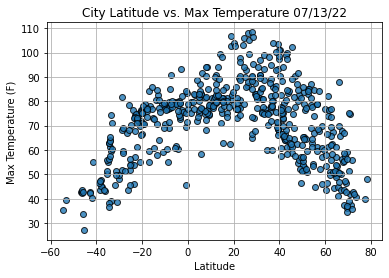

In [29]:
today = time.strftime("%x")

# plot lat vs max temp

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

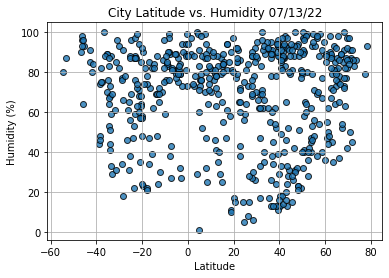

In [30]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

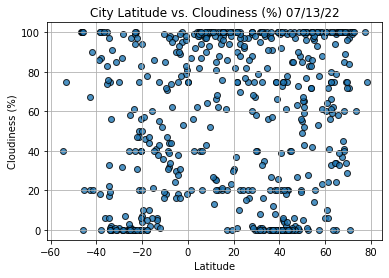

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

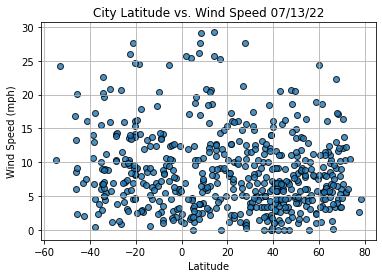

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")